In [1]:
# %pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = pybamm.BaseModel()

c = pybamm.Variable("Concentration", domain="negative particle")

In [3]:
N = -pybamm.grad(c)  # define the flux
dcdt = -pybamm.div(N)  # define the rhs equation

model.rhs = {c: dcdt}  # add the equation to rhs dictionary

In [15]:
# initial conditions
model.initial_conditions = {c: pybamm.Scalar(1)}

# boundary conditions
lbc = pybamm.Scalar(0)
rbc = pybamm.Scalar(2)  # -1e11
model.boundary_conditions = {c: {"left": (lbc, "Neumann"), "right": (rbc, "Neumann")}}

In [16]:
model.variables = {"Concentration": c, "Flux": N}

In [17]:
# define geometry
r = pybamm.SpatialVariable(
    "r", domain=["negative particle"], coord_sys="spherical polar"
)
geometry = {"negative particle": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

In [18]:
# mesh and discretise
submesh_types = {"negative particle": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}
mesh = pybamm.Mesh(geometry, submesh_types, var_pts)

In [19]:
spatial_methods = {"negative particle": pybamm.FiniteVolume()}
disc = pybamm.Discretisation(mesh, spatial_methods)
disc.process_model(model);

ModelError: Cannot re-discretise a model. Set 'inplace=False' when first discretising a model to then be able to discretise it more times (e.g. for convergence studies).

2022-10-30 21:14:16.162 - [WARNING] processed_variable.get_spatial_scale(495): No length scale set for negative particle. Using default of 1 [m].


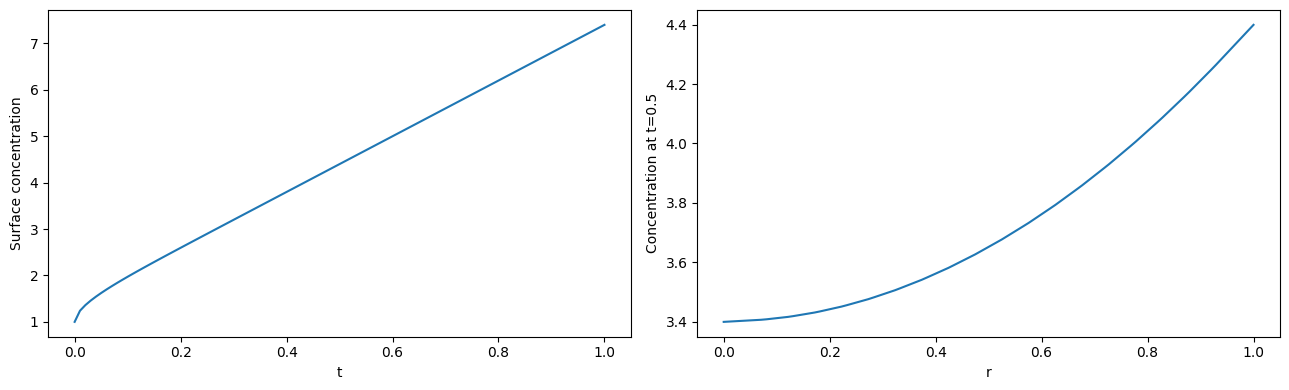

In [9]:
# solve
solver = pybamm.ScipySolver()
t = np.linspace(0, 1, 100)
solution = solver.solve(model, t)

# post-process, so that the solution can be called at any time t or space r
# (using interpolation)
c = solution["Concentration"]

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

ax1.plot(solution.t, c(solution.t, r=1))
ax1.set_xlabel("t")
ax1.set_ylabel("Surface concentration")
r = np.linspace(0, 1, 100)
ax2.plot(r, c(t=0.5, r=r))
ax2.set_xlabel("r")
ax2.set_ylabel("Concentration at t=0.5")
plt.tight_layout()
plt.show()